In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
from IPython.display import HTML

src_dir = os.path.join("../src")
sys.path.insert(0, src_dir)
from dataloader import VideoDataLoaderTF

In [2]:
def anim(a_batch, label):
    fig, ax = plt.subplots()
    anim_res = []
    imgs = a_batch.transpose((1,2,3,0))
    for i in range(imgs.shape[0]):
        ax.set_title(label)
        anim_res.append([ax.imshow(Image.fromarray(imgs[i]), animated=True)])
    return animation.ArtistAnimation(fig, anim_res, interval=100, blit=True, repeat_delay=1000)

In [3]:
batch_size = 1
ds = VideoDataLoaderTF("../data/orig-front-videos", 15, 10, num_clips=5, resolution=224, batch_size=batch_size, shuffle=True, mode='all')

2021-07-28 23:52:19.286727: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
ds.getTrainLen()

1544

X, frame_idx, y = dl.__getitem__(0)

In [5]:
train_ds, val_ds = ds.getSplitDataset()
iter_ds = iter(train_ds)
st_1 = next(iter_ds)
print(st_1)
X, frame_idx, y = st_1

2021-07-28 23:52:19.534029: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 179 more times)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 179 more times)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 179 more times)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 179 more times)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 179 more times)
deprecated pixel format used,

(<tf.Tensor: shape=(1, 3, 15, 224, 224), dtype=float32, numpy=
array([[[[[103., 123., 114., ..., 199., 199., 199.],
          [111., 111., 107., ..., 198., 198., 199.],
          [105., 103., 105., ..., 196., 197., 198.],
          ...,
          [ 75., 195., 204., ..., 100.,  65.,  71.],
          [ 95., 160., 200., ...,  69.,  90.,  73.],
          [ 88., 176., 199., ...,  69.,  68.,  78.]],

         [[ 83.,  87., 128., ..., 198., 199., 199.],
          [ 88.,  85., 119., ..., 197., 198., 198.],
          [ 90.,  93., 112., ..., 196., 196., 197.],
          ...,
          [ 83.,  74., 194., ...,  98.,  71.,  69.],
          [105., 118., 194., ...,  71.,  83.,  74.],
          [204., 184., 164., ...,  68.,  68.,  76.]],

         [[101., 119., 121., ..., 197., 198., 199.],
          [ 90., 111., 120., ..., 196., 196., 198.],
          [100., 113., 131., ..., 195., 196., 198.],
          ...,
          [ 77., 193., 196., ..., 100.,  71.,  70.],
          [ 84.,  86., 197., ...,  71., 

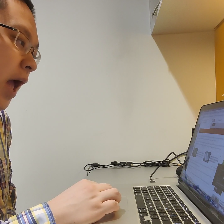

In [8]:
img = (X[0].numpy()).astype(np.uint8)
img = img.transpose((1,2,3,0))[0]
Image.fromarray(img)

In [13]:
img

array([[[103,  73,  56],
        [123,  91,  74],
        [114,  79,  59],
        ...,
        [199, 152,  81],
        [199, 152,  81],
        [199, 152,  82]],

       [[111,  83,  65],
        [111,  80,  59],
        [107,  72,  54],
        ...,
        [198, 149,  80],
        [198, 151,  81],
        [199, 152,  82]],

       [[105,  80,  58],
        [103,  74,  54],
        [105,  73,  53],
        ...,
        [196, 147,  80],
        [197, 150,  84],
        [198, 151,  85]],

       ...,

       [[ 75,  61,  82],
        [195, 183, 191],
        [204, 193, 193],
        ...,
        [100,  95,  85],
        [ 65,  59,  52],
        [ 71,  65,  58]],

       [[ 95,  82, 116],
        [160, 148, 173],
        [200, 190, 200],
        ...,
        [ 69,  63,  56],
        [ 90,  84,  75],
        [ 73,  67,  60]],

       [[ 88,  81, 111],
        [176, 165, 189],
        [199, 189, 205],
        ...,
        [ 69,  63,  57],
        [ 68,  62,  55],
        [ 78,  72,  65]]

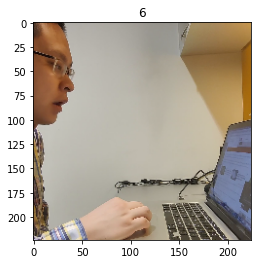

In [10]:
HTML(anim((X[0].numpy()).astype(np.uint8), y[0].numpy()).to_jshtml())